# Q2 EastWestAirlines

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df_norm = df.iloc[:,1:]

In [6]:
def min_max_scaler(i):
    data = pd.DataFrame(i)
    df_norm = (data-data.min())/(data.max()-data.min())
    return df_norm

In [7]:
df_norm = min_max_scaler(df_norm)
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [8]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# Using k-means

In [10]:
model = KMeans(n_clusters=3)
y = model.fit_predict(df_norm)

In [11]:
df_kmeans = df_norm.copy(deep=True)
df_kmeans["index"]= df_norm.index
df_kmeans["y"] = y
df_kmeans["index"].groupby(y).apply( lambda x : tuple(x))

0    (6, 30, 32, 44, 56, 58, 60, 67, 71, 72, 74, 75...
1    (0, 1, 2, 3, 5, 10, 12, 13, 14, 22, 23, 24, 25...
2    (4, 7, 8, 9, 11, 15, 16, 17, 18, 19, 20, 21, 2...
Name: index, dtype: object

# Finding optimal number of clusters

+ using inertia

In [12]:
nc = [2,3,4,5,6,7,8,9]
iner = []
for i in nc:
    km = KMeans(i)
    y=km.fit_predict(df_norm)
    iner.append(km.inertia_)

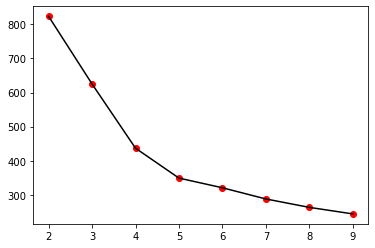

In [13]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")

In [14]:
iner[0]-iner[1]>iner[1]-iner[2]

True

In [15]:
# hence 3 is the optimal number of clusters according inertia score

+ using silhouette score

In [16]:
from sklearn.metrics import silhouette_score as sil

In [17]:
nc = [2,3,4,5,6,7,8,9]
silh = []
for i in nc:
    km = KMeans(i)
    y=km.fit_predict(df_norm)
    silh.append(sil(df_norm,y))

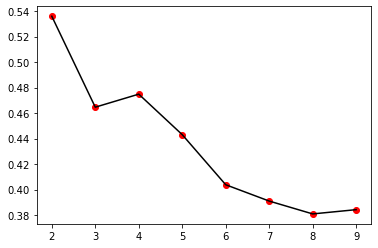

In [18]:
plt.plot(nc,silh,color="black")
plt.scatter(nc,silh,color="red")

In [19]:
# hence 2 is the optimal number of clusters according to silhouette score

+ using c-h score

In [20]:
from sklearn.metrics import calinski_harabasz_score as chs

In [21]:
nc = [2,3,4,5,6,7,8,9]
chs1 = []
for i in nc:
    km = KMeans(i)
    y=km.fit_predict(df_norm)
    chs1.append(chs(df_norm,y))

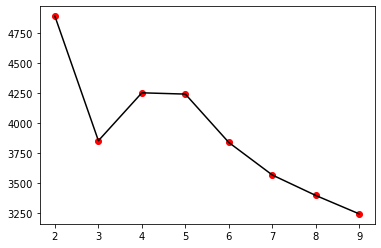

In [22]:
plt.plot(nc,chs1,color="black")
plt.scatter(nc,chs1,color="red")

In [23]:
# hence 2 is the optimal number of clusters according to c-h score

In [65]:
model = KMeans(n_clusters=4)
y = model.fit_predict(df_norm)

In [66]:
df_kmeans1 = df_norm.copy(deep=True)
df_kmeans1["index"]= df_norm.index
df_kmeans1["y"] = y
df_kmeans1["index"].groupby(y).apply( lambda x : tuple(x))

0    (7, 17, 21, 29, 36, 39, 42, 45, 47, 53, 57, 80...
1    (0, 1, 2, 3, 5, 10, 12, 13, 14, 22, 23, 24, 25...
2    (6, 30, 32, 44, 56, 58, 60, 67, 71, 72, 74, 75...
3    (4, 8, 9, 11, 15, 16, 18, 19, 20, 28, 35, 38, ...
Name: index, dtype: object

# Using hierarchical clustering

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
model = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
y = model.fit_predict(df_norm)

In [28]:
df_hc = df_norm.copy(deep=True)
df_hc["index"]= df_norm.index
df_hc["y"] = y
df_hc["index"].groupby(y).apply( lambda x : tuple(x))

0    (0, 1, 2, 3, 5, 6, 10, 12, 13, 14, 22, 23, 24,...
1    (4, 11, 15, 16, 20, 35, 41, 52, 78, 79, 85, 92...
2    (7, 8, 9, 17, 18, 19, 21, 28, 29, 36, 38, 39, ...
3                             (2015, 3235, 3583, 3594)
Name: index, dtype: object

# Using DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

In [61]:
model = DBSCAN(min_samples=130,eps=0.2)
y = model.fit_predict(df_norm)
y

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [62]:
df_dbs = df_norm.copy(deep=True)
df_dbs["index"]= df_norm.index
df_dbs["y"] = y
df_dbs["index"].groupby(y).apply( lambda x : tuple(x))

-1    (8, 9, 10, 11, 12, 18, 19, 20, 21, 28, 30, 32,...
 0    (0, 1, 2, 3, 5, 13, 14, 22, 23, 24, 25, 26, 27...
 1    (7, 17, 29, 36, 39, 45, 47, 53, 57, 80, 86, 89...
 2    (6, 58, 60, 144, 148, 185, 197, 224, 252, 297,...
 3    (4, 15, 16, 92, 108, 109, 129, 137, 150, 281, ...
Name: index, dtype: object

# Taking the optimum number of clusters as 4 instead of 2 as per K-means so that the airlines can design various plans accordingly

having low miles to qualify for award(free flight) and won it & lesser usage of credit cards-(7, 17, 21, 29, 36, 39, 42, 45, 47, 53, 57, 80...)

having low miles to qualify for award(free flight) and did not win it & lesser usage of credit cards-(0, 1, 2, 3, 5, 10, 12, 13, 14, 22, 23, 24, 25...)

having very high miles to qualify for award(free flight) and did not win it & greater usage of frequent flier credit cards-(6, 30, 32, 44, 56, 58, 60, 67, 71, 72, 74, 75...)

FREQUENT FLIER having high miles to qualify for award(free flight) and won it & greater usage of frequent flier credit cards-(4, 8, 9, 11, 15, 16, 18, 19, 20, 28, 35, 38, ...)